# Used Cars Prediction

## Problem Statement

### Business Context

There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

As a senior data scientist at Cars4U, you have to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing. For example, if the business knows the market price, it will never sell anything below it.


### Objective

To explore and visualize the dataset, build a linear regression model to predict the prices of used cars, and generate a set of insights and recommendations that will help the business.


### Data Description

The data contains the different attributes of used cars sold in different locations. The detailed data dictionary is given below.

- Brand: brand name of the car
- Model Name: model name of the car
- Location: Location in which the car is being sold or is available for purchase (cities)
- Year: Manufacturing year of the car
- Kilometers_driven: The total kilometers driven in the car by the previous owner(s) in km
- Fuel_Type: The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)
- Transmission: The type of transmission used by the car (Automatic/Manual)
- Owner_Type: Type of ownership
- Mileage: The standard mileage offered by the car company in kmpl or km/kg
- Engine: The displacement volume of the engine in CC
- Power: The maximum power of the engine in bhp
- Seats: The number of seats in the car
- New_Price: The price of a new car of the same model in INR Lakhs (1 Lakh = 100,000 INR)
- Price: The price of the used car in INR Lakhs

## Importing necessary libraries

In [1]:

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

## Loading the dataset

In [2]:
# loading the dataset
data = pd.read_csv("used_cars_data.csv")

## Data Overview

### Displaying the first few rows of the dataset

In [3]:
data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,mileage_num,engine_num,power_num,Brand,Model
0,Mumbai,2010,72000.0,CNG,Manual,First,5.0,5.51,1.75,26.60,998.0,58.16,maruti,wagon
1,Pune,2015,41000.0,Diesel,Manual,First,5.0,16.06,12.50,19.67,1582.0,126.20,hyundai,creta
2,Chennai,2011,46000.0,Petrol,Manual,First,5.0,8.61,4.50,18.20,1199.0,88.70,honda,jazz
3,Chennai,2012,87000.0,Diesel,Manual,First,7.0,11.27,6.00,20.77,1248.0,88.76,maruti,ertiga
4,Coimbatore,2013,40670.0,Diesel,Automatic,Second,5.0,53.14,17.74,15.20,1968.0,140.80,audi,a4


### Checking the shape of the dataset

In [4]:
# checking shape of the data
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

There are 7252 rows and 14 columns.


### Checking 10 random rows of the dataset

In [5]:
# let's view a sample of the data
data.sample(n=10, random_state=1)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,mileage_num,engine_num,power_num,Brand,Model
2397,Kolkata,2016,21460.0,Petrol,Manual,First,5.0,9.470,6.00,17.00,1497.0,121.36,ford,ecosport
6218,Kolkata,2013,48000.0,Diesel,Manual,First,5.0,7.880,NaN,23.40,1248.0,74.00,maruti,swift
6737,Mumbai,2015,59500.0,Petrol,Manual,First,7.0,13.580,NaN,17.30,1497.0,117.30,honda,mobilio
3659,Delhi,2015,27000.0,Petrol,Automatic,First,5.0,9.600,5.95,19.00,1199.0,88.70,honda,jazz
4513,Bangalore,2015,19000.0,Diesel,Automatic,Second,5.0,69.675,38.00,16.36,2179.0,187.70,jaguar,xf
599,Coimbatore,2019,40674.0,Diesel,Automatic,First,7.0,28.050,24.82,11.36,2755.0,171.50,toyota,innova
186,Bangalore,2014,37382.0,Diesel,Automatic,First,5.0,86.970,32.00,13.00,2143.0,201.10,mercedes-benz,e-class
305,Kochi,2014,61726.0,Diesel,Automatic,First,5.0,67.100,20.77,17.68,1968.0,174.33,audi,a6
4581,Hyderabad,2013,105000.0,Diesel,Automatic,First,5.0,44.800,19.00,17.32,1968.0,150.00,audi,q3
6616,Delhi,2014,55000.0,Diesel,Automatic,First,5.0,49.490,NaN,11.78,2143.0,167.62,mercedes-benz,new


**Observations**

In [6]:
# let's create a copy of the data to avoid any changes to original data
df = data.copy()

### Checking the data types of the columns for the dataset

In [7]:
# checking column datatypes and number of non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7252 entries, 0 to 7251
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           7252 non-null   object 
 1   Year               7252 non-null   int64  
 2   Kilometers_Driven  7251 non-null   float64
 3   Fuel_Type          7252 non-null   object 
 4   Transmission       7252 non-null   object 
 5   Owner_Type         7252 non-null   object 
 6   Seats              7199 non-null   float64
 7   New_Price          7252 non-null   float64
 8   Price              6019 non-null   float64
 9   mileage_num        7169 non-null   float64
 10  engine_num         7206 non-null   float64
 11  power_num          7077 non-null   float64
 12  Brand              7252 non-null   object 
 13  Model              7252 non-null   object 
dtypes: float64(7), int64(1), object(6)
memory usage: 793.3+ KB


**Observations**

- 6 columns are of the *object* type columns and 7 columns are of *numerical* type columns

### Checking for duplicate values

In [8]:
# checking for duplicate values
df.duplicated().sum()

2

- There are two duplicate value in the data.
- Let's take a closer look at it.

In [9]:
df[df.duplicated(keep=False) == True]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,mileage_num,engine_num,power_num,Brand,Model
3623,Hyderabad,2007,52195.0,Petrol,Manual,First,5.0,4.36,1.75,19.7,796.0,46.3,maruti,alto
4781,Hyderabad,2007,52195.0,Petrol,Manual,First,5.0,4.36,1.75,19.7,796.0,46.3,maruti,alto
6940,Kolkata,2017,13000.0,Diesel,Manual,First,5.0,13.58,NaN,26.0,1498.0,98.6,honda,city
7077,Kolkata,2017,13000.0,Diesel,Manual,First,5.0,13.58,NaN,26.0,1498.0,98.6,honda,city


**Observations**

- There is a good chance that two cars of the same build were sold in the same location.
- But it is highly unlikely that both of them will have the same number of kilometers driven.
- So, we will drop the row which occurs second.

In [10]:
df.drop(4781, inplace=True)
df.drop(6940, inplace=True)

In [11]:
# checking for duplicate values
df.duplicated().sum()

0

- There are no duplicate values

## <a name='link2'>Exploratory Data Analysis (EDA) Summary</a>

**The below functions need to be defined to carry out the Exploratory Data Analysis.**

In [12]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [13]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Univariate Analysis

In [14]:
# creating a copy of the dataframe
df1 = df.copy()

#### `Price`

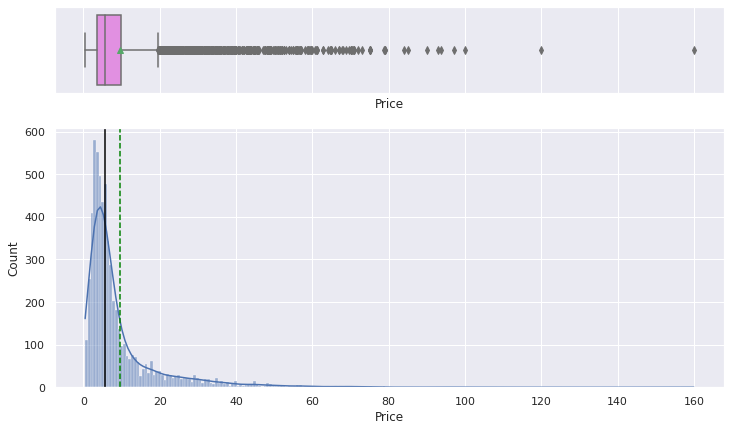

In [15]:
histogram_boxplot(df1, "Price", kde=True)

**Observations**

* This is a highly skewed distribution.

#### `New_Price`

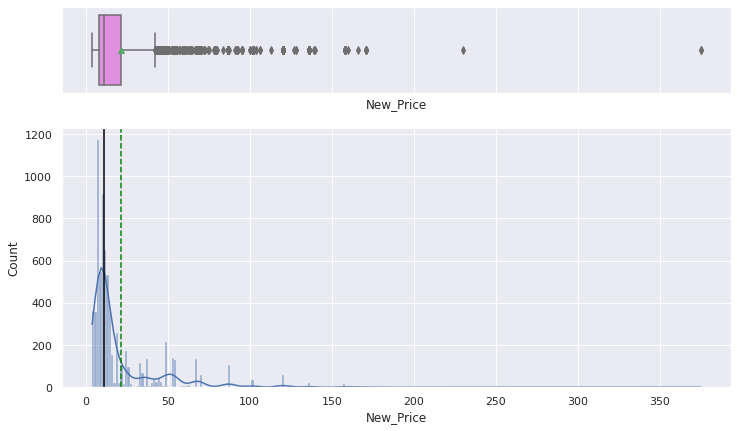

In [16]:
histogram_boxplot(df1, "New_Price", kde=True)

**Observations**

* This is another highly skewed distribution.

#### `Brand`

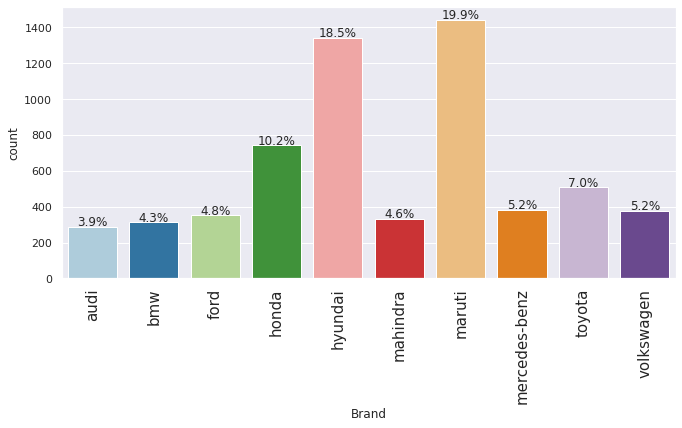

In [17]:
labeled_barplot(df1, "Brand", perc=True, n=10)

* Most of the cars in the data belong to Maruti or Hyundai. The price of used cars is lower for budget brands like Porsche, Bentley, Lamborghini, etc. The price of used cars is higher for premium brands like Maruti, Tata, Fiat, etc.

#### `Location`

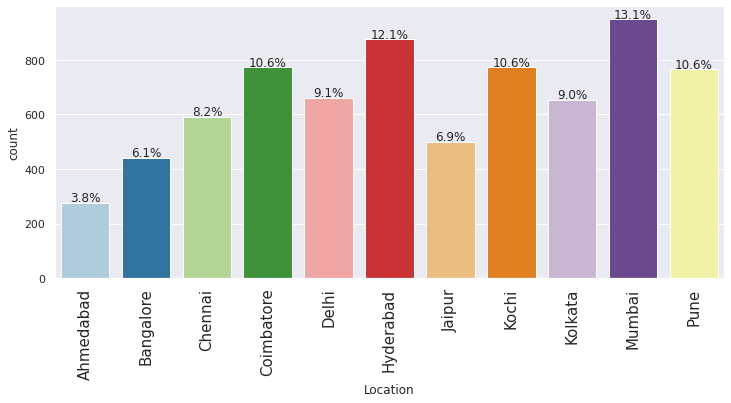

In [18]:
labeled_barplot(df1, "Location", perc=True)

* Hyderabad and Mumbai have the most demand for used cars. The price of used cars has a large IQR in Coimbatore and Bangalore.

#### `Fuel_Type`

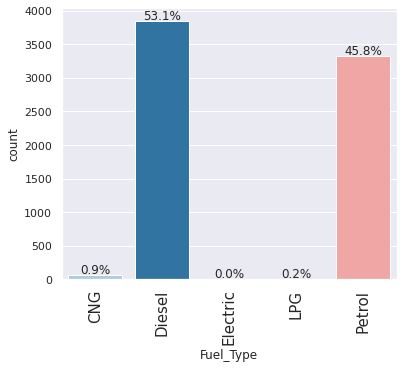

In [19]:
labeled_barplot(df1, "Fuel_Type", perc=True)

* Around 1% of the cars in the dataset do not run on diesel or petrol.

### Bivariate Analysis

#### Correlation Check

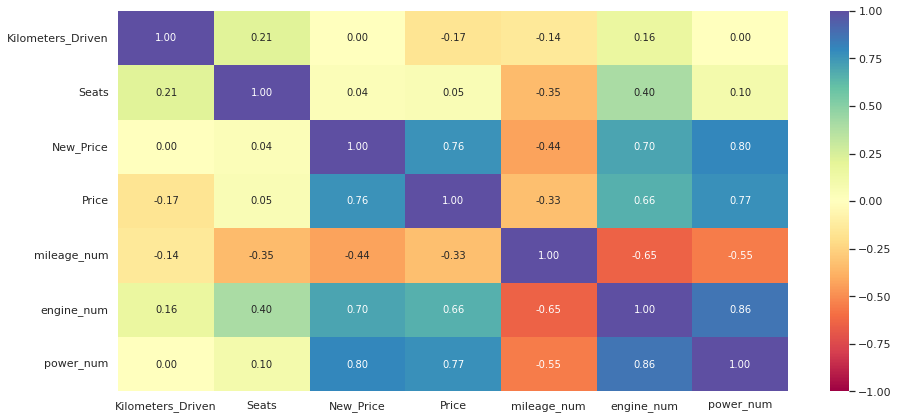

In [20]:
cols_list = df1.select_dtypes(include=np.number).columns.tolist()
# dropping Year as it is a temporal variable
cols_list.remove("Year")

plt.figure(figsize=(15, 7))
sns.heatmap(
    df1[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**Observations**

* `Power` and `Engine` are important predictors of used car price, but they are also highly correlated to each other.
* The price of a new car of the same model seems to be an important predictor of the used car price, which makes sense.

#### `Price` vs `Location`

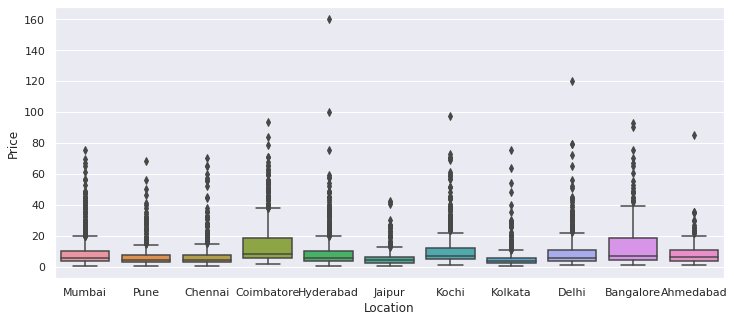

In [21]:
plt.figure(figsize=(12, 5))
sns.boxplot(x="Location", y="Price", data=df1)
plt.show()

* The price of used cars has a large IQR in Coimbatore and Bangalore.

#### `Price` vs `Brand`

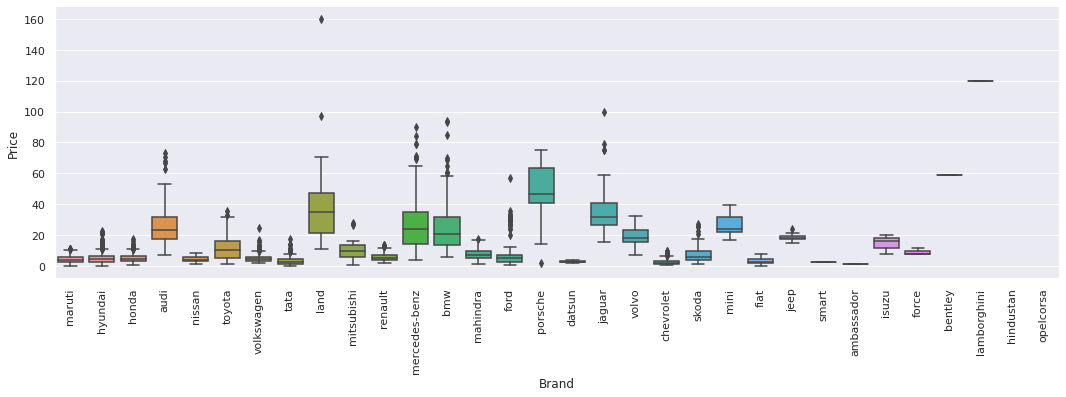

In [22]:
plt.figure(figsize=(18, 5))
sns.boxplot(x="Brand", y="Price", data=df)
plt.xticks(rotation=90)
plt.show()

* The price of used cars is lower for budget brands like Maruti, Tata, Fiat, etc.
* The price of used cars is higher for premium brands like Porsche, Audi, Lamborghini, etc.

#### `Price` vs `Year`

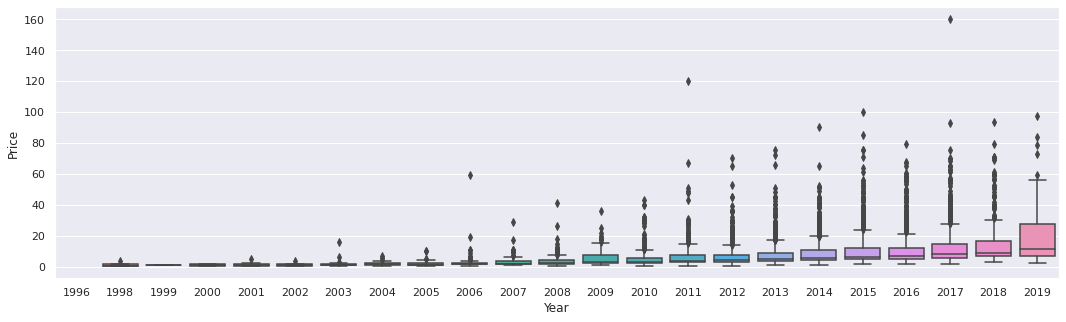

In [23]:
plt.figure(figsize=(18, 5))
sns.boxplot(x="Year", y="Price", data=df1)
plt.show()

* The price of used cars has increased over the years.

## Data Preprocessing

### Missing Value Treatment

In [24]:
# let's check again for missing values
df.isnull().sum()

Location 0
Year 0
Kilometers_Driven 1
Fuel_Type 0
Transmission 0
Owner_Type 0
Seats 53
New_Price 0
Price 1232
mileage_num 83
engine_num 46
power_num 175
Brand 0
Model 0
dtype: int64

**Let's look at a few rows where number of seats is missing.**

In [25]:
df[df["Seats"].isnull()]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,mileage_num,engine_num,power_num,Brand,Model
194,Ahmedabad,2007,60006.0,Petrol,Manual,First,NaN,13.580,2.95,NaN,NaN,NaN,honda,city
208,Kolkata,2010,42001.0,Petrol,Manual,First,NaN,7.880,2.11,16.10,NaN,NaN,maruti,swift
229,Bangalore,2015,70436.0,Diesel,Manual,First,NaN,7.650,3.60,NaN,1498.0,99.0,ford,figo
733,Chennai,2006,97800.0,Petrol,Manual,Third,NaN,7.880,1.75,16.10,NaN,NaN,maruti,swift
749,Mumbai,2008,55001.0,Diesel,Automatic,Second,NaN,120.000,26.50,NaN,NaN,NaN,land,rover
1294,Delhi,2009,55005.0,Petrol,Manual,First,NaN,13.580,3.20,12.80,NaN,NaN,honda,city
1327,Hyderabad,2015,50295.0,Petrol,Manual,First,NaN,7.880,5.80,16.10,NaN,NaN,maruti,swift
1385,Pune,2004,115000.0,Petrol,Manual,Second,NaN,13.580,1.50,NaN,NaN,NaN,honda,city
1460,Coimbatore,2008,69078.0,Petrol,Manual,First,NaN,120.000,40.88,NaN,NaN,NaN,land,rover
1917,Jaipur,2005,88000.0,Petrol,Manual,Second,NaN,13.580,1.70,13.00,1493.0,100.0,honda,city


**We'll impute these missing values one-by-one by taking the median number of seats for the particular car using the `Brand` and `Model`.**

In [26]:
df.groupby(["Brand","Model"], as_index=False)["Seats"].median()

,Brand,Model,Seats
0,ambassador,classic,5.0
1,audi,a3,5.0
2,audi,a4,5.0
3,audi,a6,5.0
4,audi,a7,5.0
...,...,...,...
217,volvo,s60,5.0
218,volvo,s80,5.0
219,volvo,v40,5.0
220,volvo,xc60,5.0


In [27]:
# imputing missing values in Seats
df["Seats"] = df.groupby(["Brand","Model"])["Seats"].transform(
    lambda x: x.fillna(x.median())
)

In [28]:
# Checking missing values in Seats
df[df["Seats"].isnull()]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,mileage_num,engine_num,power_num,Brand,Model
2369,Chennai,2008,56000.0,Petrol,Manual,Second,NaN,7.88,1.50,19.5,1061.0,NaN,maruti,estilo
3882,Kolkata,2010,40000.0,Petrol,Manual,Second,NaN,7.88,2.50,19.5,1061.0,NaN,maruti,estilo
5893,Chennai,2008,51000.0,Petrol,Manual,Second,NaN,7.88,1.75,19.5,1061.0,NaN,maruti,estilo


* Maruti Estilo can accommodate 5 people.

In [29]:
df["Seats"] = df["Seats"].fillna(5.0)

**We will use a similar method to fill missing values for the `Kilometers_Driven`, `mileage_num`, `engine_num`, and `power_num` columns.**

In [30]:
cols_list = ["Kilometers_Driven","mileage_num", "engine_num", "power_num"]

for col in cols_list:
    df[col] = df.groupby(["Brand", "Model"])[col].transform(
        lambda x: x.fillna(x.median())
    )

df.isnull().sum()

Location 0
Year 0
Kilometers_Driven 0
Fuel_Type 0
Transmission 0
Owner_Type 0
Seats 0
New_Price 0
Price 1232
mileage_num 9
engine_num 0
power_num 12
Brand 0
Model 0
dtype: int64

* There are still some missing values in `mileage_num` and `power_num`.
* We'll impute these missing values by taking the median grouped by the `Brand`.

In [31]:
cols_list = ["mileage_num", "power_num"]

for col in cols_list:
    df[col] = df.groupby(["Brand"])[col].transform(lambda x: x.fillna(x.median()))

df.isnull().sum()

Location 0
Year 0
Kilometers_Driven 0
Fuel_Type 0
Transmission 0
Owner_Type 0
Seats 0
New_Price 0
Price 1232
mileage_num 1
engine_num 0
power_num 2
Brand 0
Model 0
dtype: int64

* There are still some missing values in `mileage_num` and `power_num`.
* We'll impute these missing values using the column median across the entire data.

In [32]:
cols_list = ["mileage_num", "power_num"]

for col in cols_list:
    df[col] = df[col].fillna(df[col].median())

df.isnull().sum()

Location 0
Year 0
Kilometers_Driven 0
Fuel_Type 0
Transmission 0
Owner_Type 0
Seats 0
New_Price 0
Price 1232
mileage_num 0
engine_num 0
power_num 0
Brand 0
Model 0
dtype: int64

- Missing values in all columns except `Price` are imputed.
- We will drop the rows where `Price` is missing as it is the target variable.

In [33]:
# considering only the data points where price is not missing
df = df[df["Price"].notna()].copy()

# checking for missing values
df.isnull().sum()

Location 0
Year 0
Kilometers_Driven 0
Fuel_Type 0
Transmission 0
Owner_Type 0
Seats 0
New_Price 0
Price 0
mileage_num 0
engine_num 0
power_num 0
Brand 0
Model 0
dtype: int64

- All missing values are dealt with.

## Model Building - Linear Regression

1. We want to predict the used car price.
2. Before we proceed to build a model, we'll have to encode categorical features.
3. We'll split the data into train and test to be able to evaluate the model that we build on the train data.
4. We will build a Linear Regression model using the train data and then check it's performance.

In [34]:
# looking at value counts for non-numeric features

num_to_display = 10  # defining this up here so it's easy to change later

for colname in df.dtypes[df.dtypes == "object"].index:
    val_counts = df[colname].value_counts(dropna=False)  # will also show the NA counts
    print(val_counts[:num_to_display])

    if len(val_counts) > num_to_display:
        print(f"Only displaying first {num_to_display} of {len(val_counts)} values.")
    print("-" * 50, "\n")  # just for more space in between

Mumbai        790
Hyderabad     741
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Name: Location, dtype: int64
Only displaying first 10 of 11 values.
-------------------------------------------------- 

Diesel      3205
Petrol      2745
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64
-------------------------------------------------- 

Manual       4298
Automatic    1720
Name: Transmission, dtype: int64
-------------------------------------------------- 

First             4928
Second             968
Third              113
Fourth & Above       9
Name: Owner_Type, dtype: int64
-------------------------------------------------- 

maruti           1210
hyundai          1107
honda             608
toyota            411
mercedes-benz     318
volkswagen        315
ford              300
mahindra          272
bmw               267
audi              236
Name: Brand, 

Observations:

- Creating dummy variables for the categorical variable `Model`(211) would increase the number of features in the model extensively.

- To check the effect of these dummy variables, we can create two models
     - one with all the variables
     - one without the `Model` dummy variables

- This will allow us to see how the dummy variables affect the performance of the model.

### Model Performance Check

Before moving ahead, we define a function to check the performance of the model using different metrics.

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* We will define a function to calculate adjusted $R^2$.    
* We will create a function which will print out all the above metrics in one go.

In [35]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
        },
        index=[0],
    )

    return df_perf

### Data Preparation for modeling with all variables

In [36]:
# defining the dependent and independent variables
X = df.drop(["Price"], axis=1)
y = df["Price"]

In [37]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

X.head()

,Year,Kilometers_Driven,Seats,New_Price,mileage_num,engine_num,power_num,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Brand_audi,Brand_bentley,Brand_bmw,Brand_chevrolet,Brand_datsun,Brand_fiat,Brand_force,Brand_ford,Brand_honda,Brand_hyundai,Brand_isuzu,Brand_jaguar,Brand_jeep,Brand_lamborghini,Brand_land,Brand_mahindra,Brand_maruti,Brand_mercedes-benz,Brand_mini,Brand_mitsubishi,Brand_nissan,Brand_porsche,Brand_renault,Brand_skoda,Brand_smart,Brand_tata,Brand_toyota,Brand_volkswagen,Brand_volvo,Model_1000,Model_3,Model_5,Model_6,Model_7,Model_800,Model_a,Model_a-star,Model_a3,Model_a4,Model_a6,Model_a7,Model_a8,Model_accent,Model_accord,Model_alto,Model_amaze,Model_ameo,Model_aspire,Model_aveo,Model_avventura,Model_b,Model_baleno,Model_beat,Model_beetle,Model_bolero,Model_bolt,Model_boxster,Model_br-v,Model_brio,Model_brv,Model_c-class,Model_camry,Model_captiva,Model_captur,Model_cayenne,Model_cayman,Model_cedia,Model_celerio,Model_ciaz,Model_city,Model_civic,Model_cla,Model_classic,Model_cls-class,Model_clubman,Model_compass,Model_continental,Model_cooper,Model_corolla,Model_countryman,Model_cr-v,Model_creta,Model_crosspolo,Model_cruze,Model_d-max,Model_duster,Model_dzire,Model_e,Model_e-class,Model_ecosport,Model_eeco,Model_elantra,Model_elite,Model_endeavour,Model_enjoy,Model_eon,Model_ertiga,Model_esteem,Model_estilo,Model_etios,Model_evalia,Model_f,Model_fabia,Model_fiesta,Model_figo,Model_fluence,Model_fortuner,Model_fortwo,Model_freestyle,Model_fusion,Model_gallardo,Model_getz,Model_gl-class,Model_gla,Model_glc,Model_gle,Model_gls,Model_go,Model_grand,Model_grande,Model_hexa,Model_i10,Model_i20,Model_ignis,Model_ikon,Model_indica,Model_indigo,Model_innova,Model_jazz,Model_jeep,Model_jetta,Model_koleos,Model_kuv,Model_kwid,Model_lancer,Model_laura,Model_linea,Model_lodgy,Model_logan,Model_m-class,Model_manza,Model_micra,Model_mobilio,Model_montero,Model_mustang,Model_mux,Model_nano,Model_new,Model_nexon,Model_nuvosport,Model_octavia,Model_omni,Model_one,Model_optra,Model_outlander,Model_pajero,Model_panamera,Model_passat,Model_petra,Model_platinum,Model_polo,Model_prius,Model_pulse,Model_punto,Model_q3,Model_q5,Model_q7,Model_qualis,Model_quanto,Model_r-class,Model_rapid,Model_redi,Model_redi-go,Model_renault,Model_ritz,Model_rover,Model_rs5,Model_s,Model_s-class,Model_s-cross,Model_s60,Model_s80,Model_safari,Model_sail,Model_santa,Model_santro,Model_scala,Model_scorpio,Model_siena,Model_sl-class,Model_slc,Model_slk-class,Model_sonata,Model_spark,Model_ssangyong,Model_sumo,Model_sunny,Model_superb,Model_swift,Model_sx4,Model_tavera,Model_teana,Model_terrano,Model_thar,Model_tiago,Model_tigor,Model_tiguan,Model_tt,Model_tucson,Model_tuv,Model_v40,Model_vento,Model_venture,Model_verito,Model_verna,Model_versa,Model_vitara,Model_wagon,Model_wr-v,Model_wrv,Model_x-trail,Model_x1,Model_x3,Model_x5,Model_x6,Model_xc60,Model_xc90,Model_xcent,Model_xe,Model_xenon,Model_xf,Model_xj,Model_xuv300,Model_xuv500,Model_xylo,Model_yeti,Model_z4,Model_zen,Model_zest
0,2010,72000.0,5.0,5.51,26.60,998.0,58.16,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2015,41000.0,5.0,16.06,19.67,1582.0,126.20,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [38]:
X.shape

(6018, 264)

- The dataset X has 264 columns and 6018 rows

In [39]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [40]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 4212
Number of rows in test data = 1806


### Model Building - Linear Regression with all variables

In [41]:
# fitting a linear model
lin_reg_model1 = LinearRegression()
lin_reg_model1.fit(x_train, y_train)

LinearRegression() In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org. LinearRegression LinearRegression()

In [42]:
# Checking model performance on train set
print("Training Performance:")
lin_reg_model1_perf_train = model_performance_regression(
    lin_reg_model1, x_train, y_train
)
lin_reg_model1_perf_train

Training Performance:


,RMSE,MAE,R-squared,Adj. R-squared
0,4.177332,2.24432,0.86575,0.856771


* Both the R-squared and Adjusted R squared of our model are high. This is a clear indication that we have been able to create a very good model that is able to explain variance in the price of used cars up to ~87%.

* The model is not an underfitting model.

* Let's do a quick performance check on the test data.

In [43]:
# Checking model performance on test set
print("Test Performance:")
lin_reg_model1_perf_test = model_performance_regression(lin_reg_model1, x_test, y_test)
lin_reg_model1_perf_test

Test Performance:


,RMSE,MAE,R-squared,Adj. R-squared
0,4.305989,2.387192,0.83718,0.809286


* Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE) of train and test data are close, which indicates that our model is not overfitting the train data.

* MAE indicates that our current model is able to predict used car prices within a mean error of 4.3 lakhs on test data.

* The units of both RMSE and MAE are the same, Lakhs in this case. But RMSE is greater than MAE because it penalizes the outliers more.

### Data Preparation for modeling without dummy variables for Model

In [44]:
# defining the dependent and independent variables
X = df.drop(["Price", "Model"], axis=1)
y = df["Price"]

# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

# splitting the data in 70:30 ratio for train to test data

x_train2, x_test2, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1
)

print("Number of rows in train data =", x_train2.shape[0])
print("Number of rows in test data =", x_test2.shape[0])

Number of rows in train data = 4212
Number of rows in test data = 1806


### Model Building - Linear Regression without dummy variables for Model

In [45]:
# fitting a linear model
lin_reg_model2 = LinearRegression()
lin_reg_model2.fit(x_train2, y_train)

LinearRegression() In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org. LinearRegression LinearRegression()

In [46]:
# Checking model performance on train set
print("Training Performance:")
lin_reg_model2_perf_train = model_performance_regression(
    lin_reg_model2, x_train2, y_train
)
lin_reg_model2_perf_train

Training Performance:


,RMSE,MAE,R-squared,Adj. R-squared
0,5.373312,2.885274,0.777874,0.774988


In [47]:
# Checking model performance on test set
print("Test Performance:")
lin_reg_model2_perf_test = model_performance_regression(lin_reg_model2, x_test2, y_test)
lin_reg_model2_perf_test

Test Performance:


,RMSE,MAE,R-squared,Adj. R-squared
0,4.708771,2.758357,0.805295,0.799291


* Both the R-squared and Adjusted R squared of our model are lesser than before and the model is able to explain up to 80% of the variance in the price of used cars.
* MAE indicates that our current model is able to predict used car prices within a mean error of 2.75 lakhs on test data.

### Model Performance Comparison

In [48]:
# training performance comparison

models_train_comp_df = pd.concat(
    [lin_reg_model1_perf_train.T, lin_reg_model2_perf_train.T,], axis=1,
)

models_train_comp_df.columns = [
    "Linear Regression (all variables)",
    "Linear Regression (without dummy variables for Model)",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Linear Regression (all variables),Linear Regression (without dummy variables for Model)
RMSE,4.177332,5.373312
MAE,2.244320,2.885274
R-squared,0.865750,0.777874
Adj. R-squared,0.856771,0.774988


In [49]:
# test performance comparison

models_test_comp_df = pd.concat(
    [lin_reg_model1_perf_test.T, lin_reg_model2_perf_test.T,], axis=1,
)

models_test_comp_df.columns = [
    "Linear Regression (all variables)",
    "Linear Regression (without dummy variables for Model)",
]

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Linear Regression (all variables),Linear Regression (without dummy variables for Model)
RMSE,4.305989,4.708771
MAE,2.387192,2.758357
R-squared,0.837180,0.805295
Adj. R-squared,0.809286,0.799291


**We will consider *lin_reg_model1* (model with all variables) as our final model.**

## Business Insights and Recommendations

1. Our linear regression model has successfully explained approximately 83% of the variation in the data.
2. The Mean Absolute Error (MAE) indicates that our current model can predict used car prices with an average error of around 2.38 lakhs on the test data.
3. Our analysis has revealed that certain factors, such as the year of manufacture, the number of seats, and the maximum power of the engine, tend to increase the price of a used car. Conversely, factors like the distance traveled and engine volume tend to decrease the price of a used car.
4. Certain markets tend to have higher prices, and it would be beneficial for Cars4U to focus on these markets and establish offices in these areas if necessary.
5. We need to gather data on the cost side of things before discussing profitability in the business.
6. After analyzing the data, the next step would be to cluster the different data sets and determine whether we should create multiple models for different locations or car types.


